# TP08 - Sélection de modèles

L'objectif de ce TP est de mettre en oeuvre une 
* de mesurer le risque empirique d'un modèle d'apprentissage supervisé pour différentes tailles d'échantillon (_i.e._, différentes quantités d'échantillons d'apprentissage)
* de sélectionner la valeur optimale et d'évaluer la capacité de généralisation d'un modèle d'apprentissage supervisé (classification) en utilisant 
 * un découpage en données d'apprentissage, de validation et de test 
 * le principe de la validation croisée

In [1]:
import numpy as np
import pandas as pd

import random

import seaborn as sn

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

## Partie 1. Les données

Les données utilisées dans le cadre de ce TP sont des images de chiffres écrit manuscritement. La reconnaissance automatique de ces chiffres (et plus généralement d'écriture manuscrite) est un problème classique mais complexe. Elle est notamment utilisée dans les systsèmes de tri automatique du courrier.
Les données utilisées pour ce TP correspondent à un extrait simplifié des données MNIST (Modified National Institure of Standards and Technology) qui contient à l'origine 70 000 images de chiffres de 0 à 9. 

Chaque image (_i.e._, une observation) a une taille de 8 pix. $\times$ 8 pix. Ce qui corresponds à un vecteur composées de $d=64$ variables ($\mathbf{x}_i \in \mathbb{R}^d$ pour $1\le i\le m$).

**Note** : Les imagettes de taille de 8 pix. $\times$ 8 pix sont obtenues en applicant une réduction de dimension aux images binaires originales de taille 32 pix. $\times$ 32 pix. Les images originales ont été découpées en blocs de 4 pix. $\times$ 4 pix. (sans chevauchement). Dans chaque bloc, on a compté le nombre de "1" qui sert de nouvelles valeurs de pixel pour créer une image (non-binaire) de taille 8 pix. $\times$ 8 pix avec chaque pixel pouvant avoir une valeur comprise entre 0 et 16.

In [2]:
#-- Chargement des données
digits = datasets.load_digits()
X = digits.data
Y = digits.target
#print(digits.DESCR)

<Figure size 432x288 with 0 Axes>

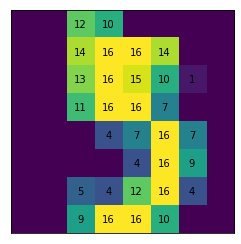

Variables:  [ 0.  0. 12. 10.  0.  0.  0.  0.  0.  0. 14. 16. 16. 14.  0.  0.  0.  0.
 13. 16. 15. 10.  1.  0.  0.  0. 11. 16. 16.  7.  0.  0.  0.  0.  0.  4.
  7. 16.  7.  0.  0.  0.  0.  0.  4. 16.  9.  0.  0.  0.  5.  4. 12. 16.
  4.  0.  0.  0.  9. 16. 16. 10.  0.  0.]
Classe asociée:  5


<Figure size 432x288 with 0 Axes>

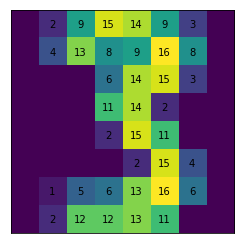

Variables:  [ 0.  2.  9. 15. 14.  9.  3.  0.  0.  4. 13.  8.  9. 16.  8.  0.  0.  0.
  0.  6. 14. 15.  3.  0.  0.  0.  0. 11. 14.  2.  0.  0.  0.  0.  0.  2.
 15. 11.  0.  0.  0.  0.  0.  0.  2. 15.  4.  0.  0.  1.  5.  6. 13. 16.
  6.  0.  0.  2. 12. 12. 13. 11.  0.  0.]
Classe asociée:  3
(1797, 64)
(1797, 8, 8)


In [3]:
#-- Visualisation de données
disp_imgno = [5, 13] # Tester d'autres valeurs
for ll in disp_imgno:
    plt.figure()
    plt.matshow(digits.images[ll])
    for (i, j), z in np.ndenumerate(digits.images[ll]):
        if z!=0:
            plt.text(j, i, '{:d}'.format(int(z)), ha='center', va='center')
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    plt.show()
    print("Variables: ", X[ll,:])
    print("Classe asociée: ", Y[ll])
print(X.shape)
print(digits.images.shape)

**Questions** : 
* Quel est le lien entre les images (`digit.images[ll]`) et les variables (`X[ll,:]`) + la classe associée (`Y[ll]`)? <br>
Une image = Une observation = Une classe
* Quel est le nombre de données d'apprentissage ? <br>
m = 1797 soit une ligne de l'image<br>
d = 64

## Partie 2. Influence de la taille de l'échantillon
L'objectif ici est d'évaluer les performances d'un algorithme de classification (risque empirique et risque réel), le $k$-Plus Proches Voisins (PPV), lorsque le nombre de données d'apprentissage augmente ($m$).

**Question** : Rappelez brièvement le principe de fonctionnement du $k$-PPV.

Principe de fonctionnement du k-PPV:<br>
On observe les k plus proches voisins du point dont on souhaite déterminer la classe et la classe la plus presente dans le voisinnage sera celle associé au nouveua points.


### 1. Risque empirique

**2.1.a** Appliquer un $k$-PPV avec $k=1$. Calculer le taux d'erreur (qui corresponds au risque empirique $\mathcal{R}_{emp}$) et expliquer le résultat.

**Astuces** : 
* Vous pouvez utiliser l'algorithme des $k$-PPV de Scikit-Learn: [doc](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). Trouvez le nom de l'hyperparamètre qui vous permet de régler le nombre de voisins considéré lors de l'apprentissage ($k$).
* Le taux d'erreur est égal à 1 - Overall Accuracy (vous pouvez utiliser votre implémentation du TP précédent).

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

#-- k-PPV
knn = KNeighborsClassifier(n_neighbors=1)
y_pred = knn.fit(X, Y).predict(X)
Z = knn.fit(X_train, Y_train).predict(X_test)
ppv = np.mean(y_pred != Y)
print ("Taux d'erreur du 1-PPV", ppv)

Taux d'erreur du 1-PPV 0.0


**2.1.b** Appliquer un $k$-PPV avec $k=5$. Calculer le taux d'erreur $\mathcal{R}_{emp}$ et afficher la matrice de confusion.

**Astuce** : 
* Vous pouvez utiliser votre méthode `getConfusionMatrix()` développée au TP07, et comparer le résultat avec la matrice de confusion calculée par Scikit-Learn : `C = confusion_matrix(Y,Yhat)`.
* Pour un affichage simple de la matrice de confusion :
``` 
plt.figure()
plt.imshow(C)
plt.show()
```
* Pour un affichage plus élaboré avec Seaborn :
```
labels = data.target_names
df_cm = pd.DataFrame(C, index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure()
sn.heatmap(df_cm, annot=True, fmt='d')
```

Taux d'erreur du 5-PPV 0.009460211463550361


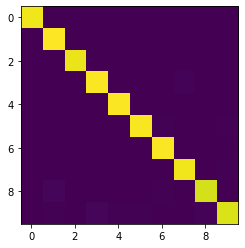

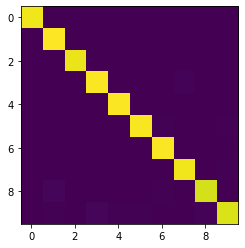

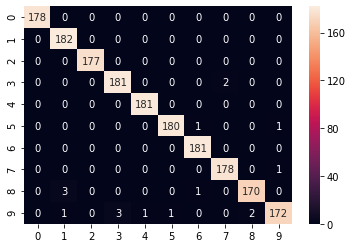

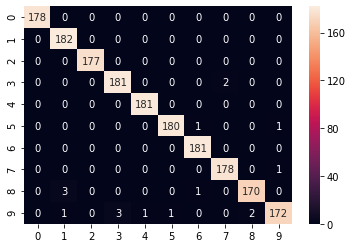

In [5]:
#-- Calcul de la matrice de confusion
def getConfusionMatrix(Y, yhat):
    d = len(np.unique(Y))
    result = np.zeros((d, d))
    for i in range(len(Y)):
        result[Y[i]][yhat[i]] += 1
    return result
    
knn = KNeighborsClassifier(n_neighbors=5)
y_pred = knn.fit(X, Y).predict(X)
Z = knn.fit(X_train, Y_train).predict(X_test)
print ("Taux d'erreur du 5-PPV", np.mean(y_pred != Y))

# sklearn
C = confusion_matrix(Y,y_pred)
plt.figure()
plt.imshow(C)
plt.show()

# personnel resultat identique
Cp = getConfusionMatrix(Y,y_pred)
plt.figure()
plt.imshow(Cp)
plt.show()

labels = digits.target_names

# sklearn
df_cm = pd.DataFrame(C, index = [i for i in labels], columns = [i for i in labels])
plt.figure()
sn.heatmap(df_cm, annot=True, fmt='d')

# Resultat iddentique
df_cm_p = pd.DataFrame(Cp, index = [i for i in labels], columns = [i for i in labels])
plt.figure()
sn.heatmap(df_cm_p, annot=True, fmt='.0f')

**2.1.c** Tracer l'évolution du risque empririque, pour $k=5$, en fonction de la taille des données d'apprentissage.
* Définir les différentes tailles d'apprentissage : `size = [5, 10, 25, 50, 75, 100, 150, 200, 250, 500, 1000, 1797]`.
* Tirer un échantillon aléatoire de la taille donnée.
Note : il est possible d'utiliser la méthode `random.sample` du module `random`.
* Applicquer un $5$-PPV pour chaque taille d'échantillon et calculer $\mathcal{R}_{emp}$ le risque empirique.
* Tracer l'évolution du risque empirique en fonction de la taille de l'échantillon : $\mathcal{R}_{emp}=f(size)$.

**Commenter**

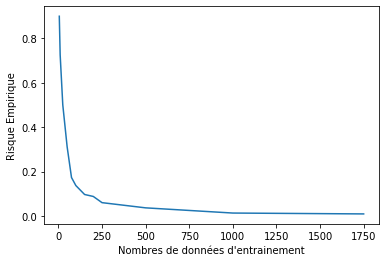

In [6]:
size = [5, 10, 25, 50, 75, 100, 150, 200, 250, 500, 1000, 1750]
def sample_perso(X, Y, nb):
    X_sample, Y_sample = [], []
    tirer = random.sample(range(X.shape[0]), nb)
    for t in tirer:
        X_sample.append(X[t,:])
        Y_sample.append(Y[t])
    return np.asarray(X_sample),np.asarray(Y_sample)

plt.figure()
knn = KNeighborsClassifier(n_neighbors=5)
predicted = []
for i in size:
    xs,ys = sample_perso(X,Y,i)
    y_pred = knn.fit(xs, ys).predict(X)
    predicted.append(np.mean(y_pred != Y))
plt.plot(size,predicted)
plt.xlabel("Nombres de données d'entrainement")
plt.ylabel("Risque Empirique")
plt.show()

Commentaires:<br>
le risque empirique diminue de maniere logarithmique: plus on a de données d'entrainement moins on a d'erreur.

### 2. Risque réel et erreur de généralisation, $k$ fixé

**2.2.a** Calculer une estimation de l'erreur de généralisation en utilisant un jeu d'apprentissage et de test ($N=297$), pour les différentes tailles testées ci-dessus, et toujours en considérant un $5$-PPV.
* Diviser aléatoirement les échantillons en sous-ensembles d'apprentissage  et de test : ` Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size=N)` avec `N` la taille de l'échantillon de test désirée.
* Superposer les deux courbes d'évolution du risque empirique et du risque réel en fonction de la taille de l'échantillon d'apprentissage. N'hésitez pas à aussi visualiser les courbes uniquement pour les plus grandes tailles d'échantillon d'apprentissage.

**Comparer et commenter**

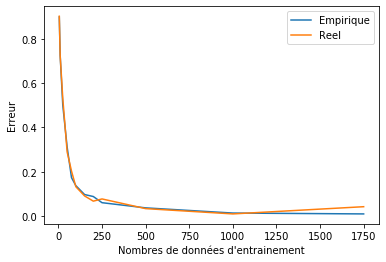

In [7]:
def risque_empirique(size, k = 5):
    knn = KNeighborsClassifier(n_neighbors=k)
    predicted = []
    for i in size:
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=X.shape[0]-i)
        y_pred = knn.fit(X_train, Y_train).predict(X_test)
        predicted.append(np.mean(y_pred != Y_test))
    return predicted

predicted2 = risque_empirique(size)
plt.figure()
plt.plot(size, predicted,  label="Empirique")
plt.plot(size, predicted2, label="Reel")
plt.legend()
plt.xlabel("Nombres de données d'entrainement")
plt.ylabel("Erreur")
plt.show()

Comparaisons et commentaires: <br>
Le risque réel me parait legerement superieur au risque empirique. Ce qui est particulierement visible apres 1250

**2.2.b** Jusqu'à présent les résultats sont obtenus pour une seule répétition alors que les résultats dépendent du découpage entre les données d'apprentissage et de test. Généralement cette procédure est répétée plusieurs fois afin d'obtenir la moyenne et la variance des résultats.

Répéter la procédure précédente (2.2.a) 20 fois, et calculer les risques empirique et réel moyens, ainsi que les variances associées. Comparer les résultats avec ceux obtenus sur une seule répétition.

**Astuce** : vous pouvez afficher les résultats avec plt.errorbar() pour afficher la courbe +/- un écart-type

**Commenter**

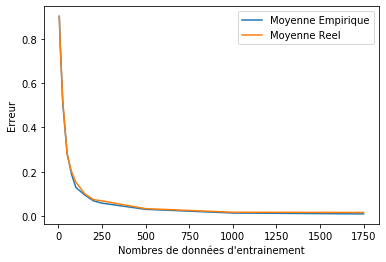

In [8]:
#-- Calculer pour 20 runs
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=297)
allpred1 = []
allpred2 = []
knn = KNeighborsClassifier(n_neighbors=5)
for j in range(20):
    predicted = []
    predicted2 = []
    for i in size:
        xs,ys = sample_perso(X,Y,i)
        y_pred = knn.fit(xs, ys).predict(X)
        predicted.append(np.mean(y_pred != Y))

        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=X.shape[0]-i)
        y_pred = knn.fit(X_train, Y_train).predict(X_test)
        predicted2.append(np.mean(y_pred != Y_test))
    allpred1.append(predicted)
    allpred2.append(predicted2)
moy1 = np.mean(allpred1, axis = 0)
moy2 = np.mean(allpred2, axis = 0)

#-- Affichage des résultats
plt.figure()
plt.plot(size, moy1, label="Moyenne Empirique")
plt.plot(size, moy2, label="Moyenne Reel")
plt.legend()
plt.xlabel("Nombres de données d'entrainement")
plt.ylabel("Erreur")
plt.show()

Commentaires (comparaison avec le résultat précédent, comparaison de la variance, comparaison entre risque empirique et risque réel)
On peut voir qu'en moyenne les deux courbes sont similaires. Suivants les lancements a partir de 1250 on peut observer une legère augmentation pour la moyenne des réels.

**2.2.c** Mettre en oeuvre une validation croisée sur 5 sous-ensembles / partitions (*$5$-fold cross validation*) sur l'ensemble des données d'apprentissage (toujours avec le $5$-PPV). Donner une estimation de l'erreur de généralisation : `scores = cross_val_score(knn, X, Y, cv=5)` [doc](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html?highlight=cross_val_score#sklearn.model_selection.cross_val_score).

**Question** : Quelle est la valeur moyenne d'Overall Accuracy que vous obtenez ?

In [9]:
scores = cross_val_score(knn, X, Y, cv=5)
print("Estimation Erreur",1-np.mean(scores))

allOA = []
for i in range(20):
    y_pred = knn.predict(X)
    allOA.append(np.mean(y_pred == Y))
print("Moyenne Overall Accuracy",np.mean(allOA))

Estimation Erreur 0.0372100885033102
Moyenne Overall Accuracy 0.9899833055091818


## Partie 3. Choix du meilleur hyperparamètre $k$ (du $k$-PPV) et estimation des performances en généralisation

L'objectif de cette partie est de déterminer la meilleure valeur de l'hyperparamètre $k$ de l'algorithme PPV et d'évaluer les performances de généralisation.

**3.1** Tracer l'évolution du risque empirique pour $k\in [1,30]$. **Commenter** On peut voir que c'est pour k = 3 que la valeur du risque est la moins élevé.

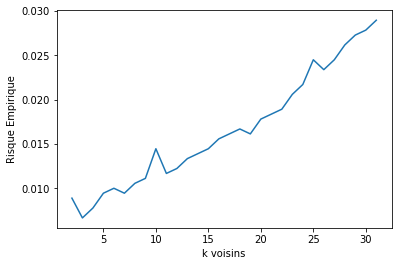

In [10]:
size = [i+2 for i in range(30)]
moyenne_empirique = []
for i in size:
    moyenne_empirique.append(np.mean(KNeighborsClassifier(n_neighbors=i).fit(X,Y).predict(X) != Y))

plt.figure()
plt.plot(size,moyenne_empirique)
plt.xlabel("k voisins")
plt.ylabel("Risque Empirique")
plt.show()

**3.2** Créer un jeu d'apprentissage qui contient 80 % des données. Les 20 % restantes seront les données de test.

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

**3.3** Pour $k\in [1,30]$, réaliser une validation croisée sur 5 sous-ensembles (*$5$-fold cross-validation*) sur le jeu de données d'apprentissage. Le même jeu de donnée d'apprentissage sera considéré.

In [12]:
def choix_k():
    erreur_min = 1
    k_choisi = 0
    for i in size:
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,Y_train)
        scores = cross_val_score(knn, X_train, Y_train, cv=5)
        if (1-np.mean(scores)) <= erreur_min:
            erreur_min = 1-np.mean(scores)
            k  = i
    return k

**3.4** Quelle est la meilleure valeur de $k$ à choisir ? La valeur de k choisit est soit k=3 soit k=5 cela change suivant l'execution

In [13]:
print(choix_k())

3


Valeur de k optimale 3 ou 5

**3.5** Pour cette valeur de $k$ optimale, donner une estimation du risque réel. La phase d'apprentissage sera réalisée sur l'ensemble des données d'apprentissage.

In [14]:
y_pred = KNeighborsClassifier(n_neighbors=choix_k()).fit(X_train, Y_train).predict(X_test)
print("Risque", np.mean(y_pred != Y_test))

Risque 0.008333333333333333


**3.6** Calculer la matrice de confusion du modèle. Que pensez vous de ce modèle ? Le modèle semble faire peu d'erreur

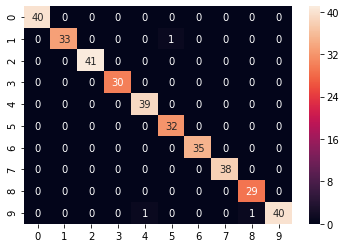

In [15]:
C = confusion_matrix(Y_test,y_pred)

labels = digits.target_names.astype(np.int32)
df_cm = pd.DataFrame(C, index = [i for i in labels],
                columns = [i for i in labels])
plt.figure()
sn.heatmap(df_cm, annot=True)

**3.7** Finalement, donner une estimation du risque réel en répétant 10 fois l'expérience précédente.

Quelle est la valeur du risque réel moyen que vous obtenez ?

In [16]:
allReel = []
for i in range(10):
    y_pred = KNeighborsClassifier(n_neighbors=choix_k()).fit(X_train, Y_train).predict(X_test)
    allReel.append(np.mean(y_pred != Y_test))
print(np.mean(allReel))

0.008333333333333333


Elle est toujours égale à la valeur précedente